### pycocotools를 이용한 COCO 데이터 액세스와 Segmentation Masking 시각화
* pycocotools 사용부분은 https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb 를 참조하였음. 
* pycocotools를 활용하여 coco dataset을 탐색
* pycocotools는 colab에서 이미 설치됨. 
* pycocotools 설치는 pip로 설치 시 오류가 발생하기 쉬우므로 conda 로 설치하거나 아예 git에서 소스코드를 다운로드 받아서 설치. 


In [1]:
from pycocotools.coco import COCO
import numpy as np

### COCO 데이터 세트 Annotation 다운로드 
1. COCO 데이터 세트는 아래에서 다운로드 가능
http://cocodataset.org/#download

2. 2017 Train/Val annotation 압축 파일을 다운로드 한 뒤, /content/data에 압축 해제  
2017년 Train image 파일 다운로드: wget http://images.cocodataset.org/zips/train2017.zip  
2017년 Val image 파일 다운로드: wget http://images.cocodataset.org/zips/val2017.zip  
2017년 Train/Val annoation 파일 다운로드: http://images.cocodataset.org/annotations/annotations_trainval2017.zip  


In [2]:
!mkdir -p /content/data

In [3]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-10-07 00:57:25--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.134.241
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.134.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.2MB/s    in 2.5s    

2021-10-07 00:57:28 (96.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [5]:
!unzip annotations_trainval2017.zip -d /content/data

Archive:  annotations_trainval2017.zip
  inflating: /content/data/annotations/instances_train2017.json  
  inflating: /content/data/annotations/instances_val2017.json  
  inflating: /content/data/annotations/captions_train2017.json  
  inflating: /content/data/annotations/captions_val2017.json  
  inflating: /content/data/annotations/person_keypoints_train2017.json  
  inflating: /content/data/annotations/person_keypoints_val2017.json  


### COCO Annotation 정보 확인하기

> 



In [8]:
dataDir = '/content/data'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)
print(annFile)

/content/data/annotations/instances_val2017.json


In [10]:
!ls -lia /content/data/annotations/instances_train2017.json

6160575 -rw-rw-r-- 1 root root 469785474 Sep  1  2017 /content/data/annotations/instances_train2017.json


In [ ]:
!sudo apt-get install jq

In [12]:
!jq . /content/data/annotations/instances_val2017.json > output.json

In [ ]:
!head -200 output.json

### COCO API를 활용하기 위해 annotation 파일을 COCO 객체로 로드하기

In [14]:
from pycocotools.coco import COCO

coco = COCO(annFile)

loading annotations into memory...
Done (t=0.83s)
creating index...
index created!


In [16]:
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
cats = coco.loadCats(coco.getCatIds())
cats

In [26]:
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)

[1, 18, 41]
[549220, 324158, 279278]


In [37]:
img = coco.loadImgs(324158)[0]
print(img)

{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


In [38]:
coco_url = img['coco_url']
print(coco_url)

http://images.cocodataset.org/val2017/000000324158.jpg


In [39]:
import urllib.request

def download_image(url, target_path):
    urllib.request.urlretrieve(url, target_path)

download_image(coco_url, '/content/data/' + img['file_name'])

### Instance Segmentation 시각화 - COCO API 활용한 시각화
* getAnnIds()로 특정 image에 해당하는 annotation id를 가져온 후에 이 id를 loadAnns()로 입력하여 해당 이미지의 모든 annotation 정보를 가져옴. 
* segmentation 정보는 polygon 형태로 되어 있음. 
* annotation 정보를 coco.showAnns(anns)에 입력하여 instance segmentation 시각화 수행. 

In [40]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[10673, 638724, 2162813]

In [41]:
anns = coco.loadAnns(annIds)
anns

[{'area': 759.3375500000002,
  'bbox': [196.51, 183.36, 23.95, 53.02],
  'category_id': 18,
  'id': 10673,
  'image_id': 324158,
  'iscrowd': 0,
  'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    2

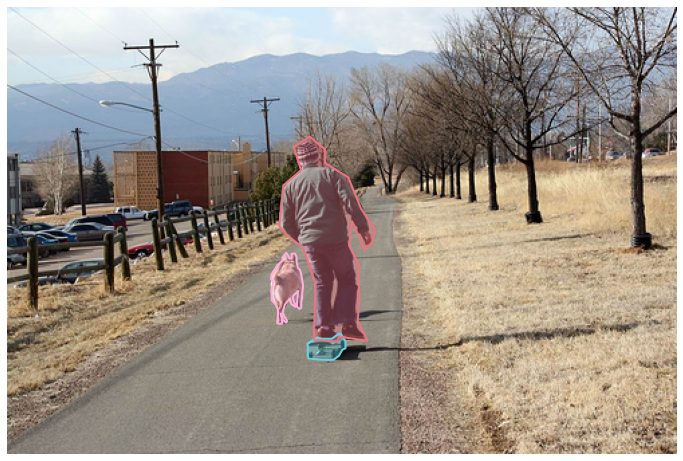

In [44]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

file_path = '/content/data/' + img['file_name']

image_array = cv2.imread(file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(image_array)
plt.axis('off')

coco.showAnns(anns)

### Polygon Annotation 정보를 이용하여 Instance Segmentation 시각화
* Polygon 정보를 직접 추출하여 이를 시각화
* polygon 정보를 coco API를 활용하여 masking 형태로 변환 후 해당 masking을 원본 이미지에 적용하여 시각화.  

In [47]:
ann_2_seg = anns[2]['segmentation'][0]
print(ann_2_seg)

[228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]


In [48]:
polygon_x = [x for index, x in enumerate(ann_2_seg) if index % 2 == 0]
polygon_y = [y for index, y in enumerate(ann_2_seg) if index % 2 == 1]
print('polygon_x:', polygon_x)
print('polygon_y', polygon_y)
polygon_xy = [[x,y] for x, y in zip(polygon_x, polygon_y)]
print('polygon_xy:', polygon_xy)

polygon_x: [228.43, 229.63, 224.24, 220.65, 207.49, 202.71, 205.7, 218.86, 213.47, 225.44, 236.8, 236.8, 254.15, 263.72, 274.49, 271.5, 266.12, 257.14, 254.75, 261.93, 262.53, 261.33, 268.51, 247.57, 245.78, 229.03]
polygon_y [247.9, 206.62, 191.07, 179.7, 169.53, 163.55, 133.04, 121.68, 104.33, 96.55, 106.12, 116.29, 127.06, 150.39, 166.54, 177.31, 181.5, 159.96, 177.91, 192.27, 216.79, 234.14, 249.1, 246.11, 249.69, 248.5]
polygon_xy: [[228.43, 247.9], [229.63, 206.62], [224.24, 191.07], [220.65, 179.7], [207.49, 169.53], [202.71, 163.55], [205.7, 133.04], [218.86, 121.68], [213.47, 104.33], [225.44, 96.55], [236.8, 106.12], [236.8, 116.29], [254.15, 127.06], [263.72, 150.39], [274.49, 166.54], [271.5, 177.31], [266.12, 181.5], [257.14, 159.96], [254.75, 177.91], [261.93, 192.27], [262.53, 216.79], [261.33, 234.14], [268.51, 249.1], [247.57, 246.11], [245.78, 249.69], [229.03, 248.5]]


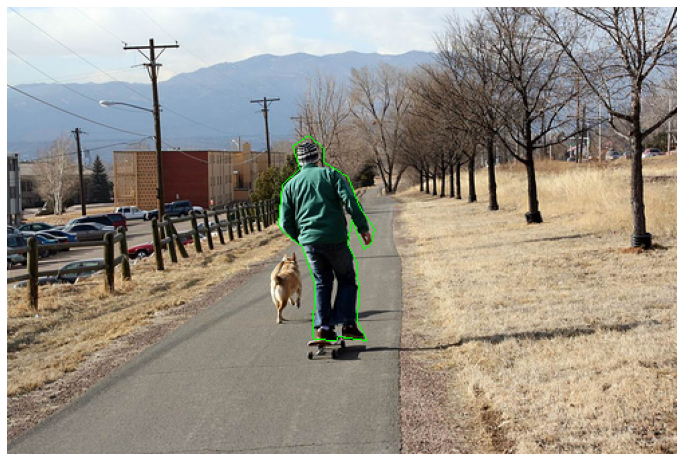

In [50]:
import numpy as np

green_color = (0, 255, 0)

draw_img = image_array.copy()
polygon_xy = np.array(polygon_xy, np.int32)
draw_img = cv2.polylines(draw_img, [polygon_xy],True ,green_color)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)
plt.axis('off')
plt.show()

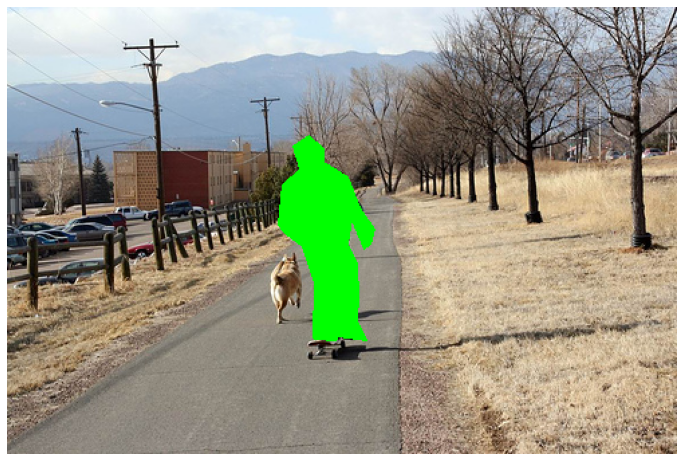

In [51]:
green_color = (0, 255, 0)

draw_img = image_array.copy()
polygon_xy = np.array(polygon_xy, np.int32)
draw_img = cv2.fillPoly(draw_img, [polygon_xy] ,green_color)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)
plt.axis('off')
plt.show()

In [52]:
# coco api의 annToMask()를 이용하여 polygon을 mask 형태로 변환
mask = coco.annToMask(anns[2])
print('image shape:', image_array.shape, 'mask shape:', mask.shape)
print('0보다 큰 값이 있는 mask shape:', mask[mask > 0].shape, '0이 있는 mask shape:', mask[mask == 0].shape)
print(mask[mask > 0])

image shape: (334, 500, 3) mask shape: (334, 500)
0보다 큰 값이 있는 mask shape: (6014,) 0이 있는 mask shape: (160986,)
[1 1 1 ... 1 1 1]


(-0.5, 499.5, 333.5, -0.5)

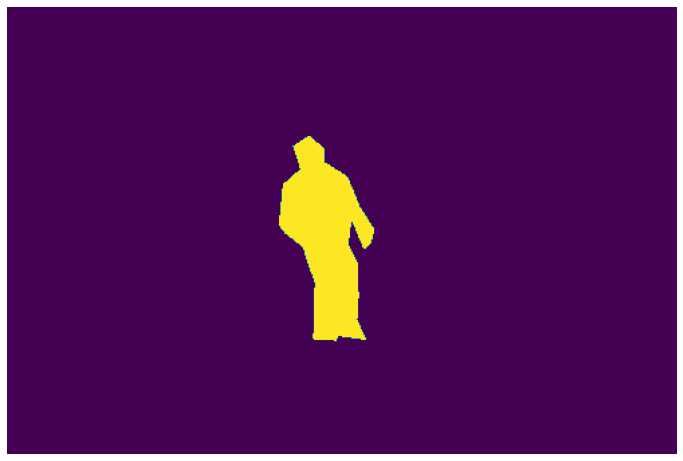

In [53]:
plt.figure(figsize=(12, 14))
plt.imshow(mask)
plt.axis('off')

### Polygon 정보를 mask로 변환하여 Instance Segmentation 시각화 
* cv2.fillPoly()로 polygon을 mask형태로 변환.
* layer별 masking 영역에서 0을 제외한 pixel 영역을 layer별 시각화

zero_mask shape: (334, 500) mask shape: (334, 500)
masked_polygon 0보다 큰 값: [1. 1. 1. ... 1. 1. 1.]


(-0.5, 499.5, 333.5, -0.5)

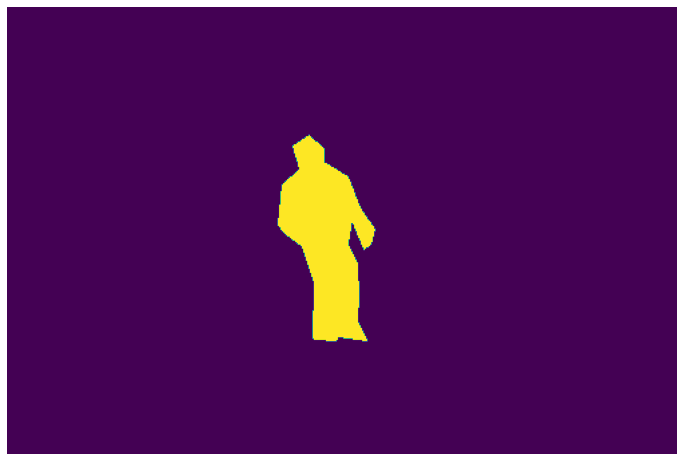

In [56]:
zero_mask = np.zeros(image_array.shape[0:2])
masked_polygon = cv2.fillPoly(zero_mask, [polygon_xy], 1)
print('zero_mask shape:', zero_mask.shape, 'mask shape:', masked_polygon.shape)
print('masked_polygon 0보다 큰 값:', masked_polygon[masked_polygon > 0])

plt.figure(figsize=(12, 14))
plt.imshow(masked_polygon)
plt.axis('off')


In [57]:
masked_bool = masked_polygon.astype(bool)
print('masked_bool shape:', masked_bool.shape)
print(masked_bool[masked_bool==1].shape, masked_bool[masked_bool==0].shape)
print(masked_bool[masked_bool==1])

masked_bool shape: (334, 500)
(6184,) (160816,)
[ True  True  True ...  True  True  True]


In [58]:
def apply_mask_01(image, mask, color, alpha=0.5):
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] * 
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, : ,c])
    return image

(-0.5, 499.5, 333.5, -0.5)

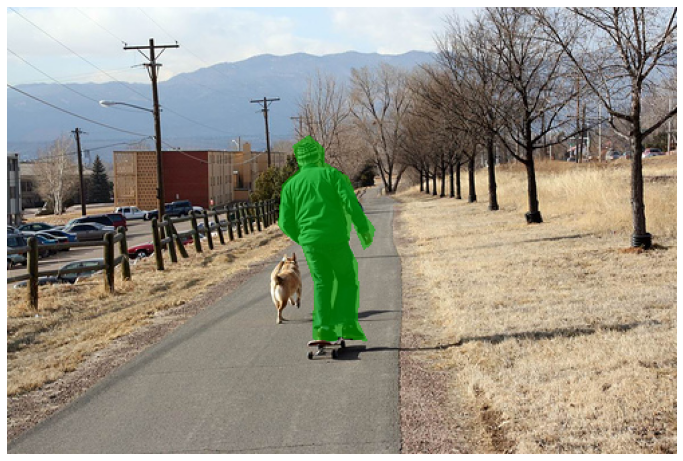

In [59]:
draw_img = image_array.copy()
# masking 정보는 2차원 bool array로 전달. 
masked_image = apply_mask_01(draw_img, masked_bool, (0, 255, 0), alpha=0.6)

plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

In [60]:
def apply_mask_02(image, mask, color, alpha=0.5):
  """Apply the given mask to the image.
  """
  image = np.where(mask == 1, color, image)
  return image

(-0.5, 499.5, 333.5, -0.5)

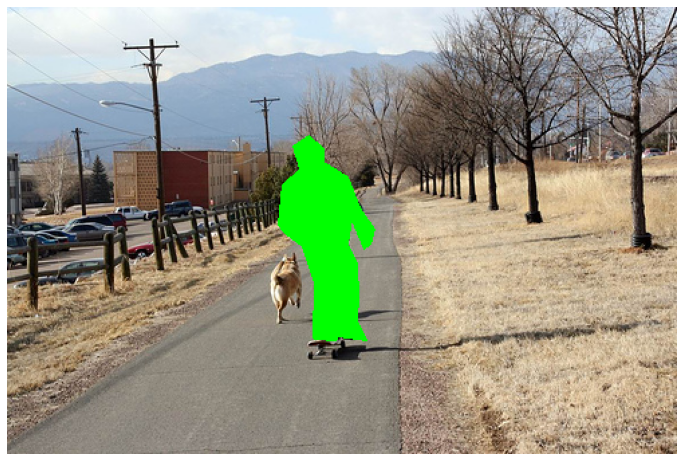

In [61]:
draw_img = image_array.copy()
stacked_mask = np.stack([masked_bool, masked_bool, masked_bool], axis=2)
masked_image = apply_mask_02(draw_img, stacked_mask, (0, 255, 0))
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

### bitwise_and 연산으로 오브젝트 영역을 제외하고 나머지 영역은 모두 0 처리하기

(-0.5, 499.5, 333.5, -0.5)

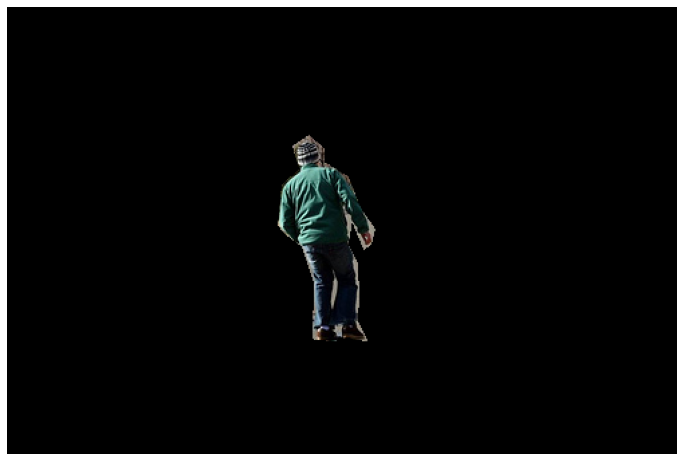

In [63]:
s_mask_int = (masked_bool * 255).astype('uint8')
draw_img = image_array.copy()

only_mask_image = cv2.bitwise_and(draw_img, draw_img, mask=s_mask_int)
plt.figure(figsize=(12, 14))
plt.imshow(only_mask_image)
plt.axis('off')

### Object segmentation의 외곽선 그리기
* opencv의 findContours()와 drawContours()를 이용하여 외곽선을 그림. 
* 2차원 masking bool array를 0또는 255 숫자로 변경한 후 findContours()를 적용. 
* findContours() 설명은 https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour 참조

(-0.5, 499.5, 333.5, -0.5)

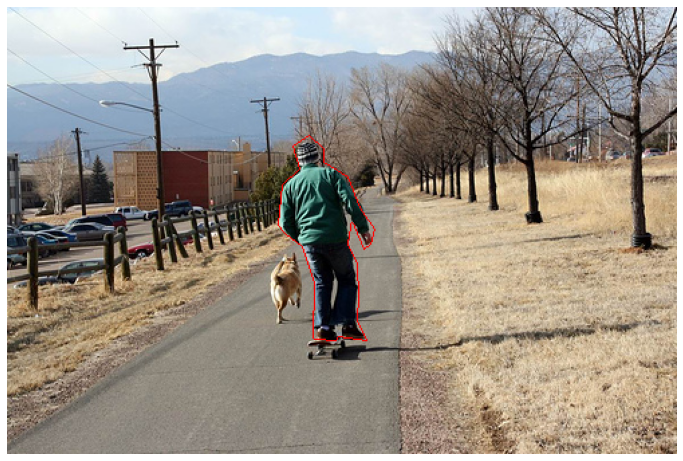

In [65]:
draw_img = image_array.copy()

s_mask_int = (masked_bool * 255).astype('uint8')
contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
masked_image = cv2.drawContours(draw_img, contours, -1, (255, 0, 0), 1, cv2.LINE_8, hierarchy, 100)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

### Segmentation 코드 함수화

In [100]:
def get_polygon_xy(ann_seg):
    polygon_x = [x for index, x in enumerate(ann_seg) if index % 2 == 0]
    polygon_y = [y for index, y in enumerate(ann_seg) if index % 2 == 1]
    polygon_xy = [[x,y] for x,y in zip(polygon_x, polygon_y)]
    polygon_xy = np.array(polygon_xy, np.int32)
    return polygon_xy

def get_mask(image_array_shape, polygon_xy):
    mask = np.zeros(image_array_shape)
    masked_polygon = cv2.fillPoly(mask, [polygon_xy], 1)

    return masked_polygon

def apply_mask(image, mask, color, alpha=0.6):
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] * (1-alpha) + alpha * color[c]*255,
                                  image[:, : ,c])
        
    return image

def draw_segment(image_array, ann_seg_list, color_list, alpha):
    draw_image = image_array.copy()
    mask_array_shape = draw_image.shape[0:2]

    for index, ann_seg in enumerate(ann_seg_list):
        polygon_xy = get_polygon_xy(ann_seg)
        masked_polygon = get_mask(mask_array_shape, polygon_xy)

        color_object = color_list[np.random.randint(len(color_list))]
        color_contour = color_list[np.random.randint(len(color_list))]

        masked_image = apply_mask(draw_image, masked_polygon, color_object, alpha=0.6)
        # 외곽선 적용. 
        s_mask_int = (masked_polygon*255).astype("uint8")
        contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        masked_image = cv2.drawContours(masked_image, contours, -1, color_contour, 1, cv2.LINE_8, hierarchy, 100)

    return masked_image

In [101]:
color_list = [
              (0, 255, 0),
              (255, 0, 0),
              (0, 0, 255)
]
anns = coco.loadAnns(annIds)
ann_seg_list = [ann['segmentation'][0] for ann in anns]
print(ann_seg_list)

[[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16], [223.48, 251.26, 230.81, 246.74, 234.48, 247.6, 241.8, 247.6, 247.41, 243.72, 248.7, 244.15, 252.15, 249.54, 252.15, 254.71, 249.78, 255.79

(-0.5, 499.5, 333.5, -0.5)

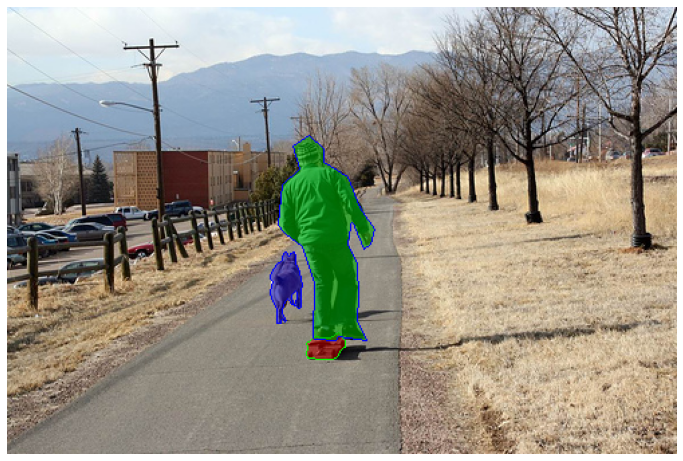

In [102]:
masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')